In [1]:
import numpy as np
import scipy
import sklearn
import _pickle
import matplotlib.pyplot as plt
from IPython.display import display, Image
from scipy import ndimage

import tensorflow as tf

# Config the matlotlib backend as plotting inline in IPython
%matplotlib inline

In [75]:
x = str.format("F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_{0}",1)
print(x)

F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_1


In [45]:
i=1
cifar_data = np.empty(shape=(50000,3072),dtype='uint8')
labels = np.empty(shape=(50000,),dtype='int32')
while i<=5:
    with open(str.format("F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_{0}",i), \
                                              'rb') as cifar_batch:
            print(cifar_batch.name)
            batch_dict = _pickle.load(cifar_batch,encoding='bytes')
            cifar_data[(i-1)*10000:i*10000] = batch_dict[b'data'].astype('float32')
            labels[(i-1)*10000:i*10000] = batch_dict[b'labels']
    i += 1
    
cifar_data = (cifar_data.astype('float32'))/255
print(np.shape(cifar_data))
print(cifar_data.dtype)
print(np.shape(labels))
print(labels.dtype)

F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_1
F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_2
F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_3
F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_4
F:\DataAnalysis&MachineLearning\ResearchAttempt\WorkWithIan\Dataset\cifar-10-batches-py\data_batch_5
(50000, 3072)
float32
(50000,)
int32


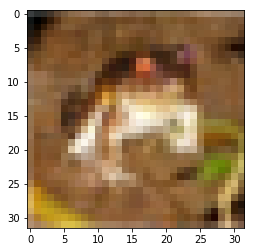

6


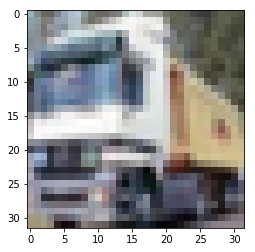

9
[0 1 2 3 4 5 6 7 8 9]


In [3]:
plt.imshow(np.reshape(cifar_data[0,:],newshape=(3,32,32),order='C').transpose(1,2,0))
plt.show()
print(labels[0])
plt.imshow(np.reshape(cifar_data[1,:],newshape=(3,32,32),order='C').transpose(1,2,0))
plt.show()
print(labels[1])
print(np.unique(labels))

In [5]:
''' Extremely important. Numpy first fills the z-dim first, then the rows, then columns in C-lie ordering '''

#print(np.shape(image_features))
#print(image_features[0,0:64])
#print(image_features[0,1024:1024+64])
#print(image_features[0,2048:2048+64])
image_features_reshaped = image_features[0:2,:]
print(np.shape(image_features_reshaped))
image_features_reshaped = np.reshape(image_features_reshaped,newshape=(2,3,32,32),order='C')
print(np.shape(image_features_reshaped))
#print(image_features_reshaped[0,:,:])
image_features_reshaped = image_features_reshaped.transpose([0,2,3,1]).astype('float')/255
plt.imshow(image_features_reshaped[1,:,:,:])
plt.show()

' Extremely important. Numpy first fills the z-dim first, then the rows, then columns in C-lie ordering '

## Tensorflow Multiclass Classification

In [ ]:
# Using tensorflow cifar10 utilities to read and load data

In [50]:
## placeholder for input. In this case CIFAR-10 dataset which is N x 3072
x = tf.placeholder(tf.float32, [None, 3072])

## Initializing tensforflow variables W and b
W = tf.Variable(tf.zeros([3072,10]))
b = tf.Variable(tf.zeros([10]))

## Implementing softmax
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.int32, [None,])
y_one_hot = tf.one_hot(indices=y_,depth=10,on_value=1,off_value=0,axis=-1)

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
#cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_one_hot, logits=y))
cross_entropy = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=y,labels=y_))

## Minimizing Cross entropy
train_step = tf.train.GradientDescentOptimizer(0.05).minimize(cross_entropy)

In [51]:
## Interactive Session
sess = tf.InteractiveSession()

## Initialize the variables
tf.global_variables_initializer().run()
for _ in range(1000):
    sess.run(train_step,feed_dict={x:cifar_data,y_:labels})

#correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_one_hot, 1))
z = tf.to_int64(y_)
correct_prediction = tf.equal(tf.argmax(y, 1), z)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: cifar_data,
                                      y_:labels}))

0.31806


## Softmax CIFAR-10

In [246]:
'''Softmax-Classifier for CIFAR-10'''

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import numpy as np
import tensorflow as tf
import time
import data_helpers

beginTime = time.time()

# Parameter definitions
batch_size = 100
learning_rate = 0.005
max_steps = 1000

# Uncommenting this line removes randomness
# You'll get exactly the same result on each run
# np.random.seed(1)

# Prepare data
data_sets = data_helpers.load_data()

# -----------------------------------------------------------------------------
# Prepare the TensorFlow graph
# (We're only defining the graph here, no actual calculations taking place)
# -----------------------------------------------------------------------------

# Define input placeholders
images_placeholder = tf.placeholder(tf.float32, shape=[None, 3072])
labels_placeholder = tf.placeholder(tf.int64, shape=[None])

# Define variables (these are the values we want to optimize)
weights = tf.Variable(tf.zeros([3072, 10]))
biases = tf.Variable(tf.zeros([10]))

# Define the classifier's result
logits = tf.matmul(images_placeholder, weights) + biases

# Define the loss function
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits,
  labels=labels_placeholder))

# Define the training operation
train_step = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss)

# Operation comparing prediction with true label
correct_prediction = tf.equal(tf.argmax(logits, 1), labels_placeholder)

# Operation calculating the accuracy of our predictions
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# -----------------------------------------------------------------------------
# Run the TensorFlow graph
# -----------------------------------------------------------------------------

with tf.Session() as sess:
  # Initialize variables
  sess.run(tf.global_variables_initializer())

  # Repeat max_steps times
  for i in range(max_steps):

    # Generate input data batch
    indices = np.random.choice(data_sets['images_train'].shape[0], batch_size)
    images_batch = data_sets['images_train'][indices]
    labels_batch = data_sets['labels_train'][indices]

    # Periodically print out the model's current accuracy
    if i % 100 == 0:
      train_accuracy = sess.run(accuracy, feed_dict={
        images_placeholder: images_batch, labels_placeholder: labels_batch})
      print('Step {:5d}: training accuracy {:g}'.format(i, train_accuracy))

    # Perform a single training step
    sess.run(train_step, feed_dict={images_placeholder: images_batch,
      labels_placeholder: labels_batch})

  # After finishing the training, evaluate on the test set
  test_accuracy = sess.run(accuracy, feed_dict={
    images_placeholder: data_sets['images_test'],
    labels_placeholder: data_sets['labels_test']})
  print('Test accuracy {:g}'.format(test_accuracy))

endTime = time.time()
print('Total time: {:5.2f}s'.format(endTime - beginTime))

ImportError: No module named 'data_helpers'

In [258]:
train_step.get_attr??